# Set-up (for colab)

In [ ]:
!git clone https://github.com/fastai/course-v3/

Cloning into 'course-v3'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5495 (delta 0), reused 2 (delta 0), pack-reused 5491
Receiving objects: 100% (5495/5495), 258.01 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (2987/2987), done.
Checking out files: 100% (860/860), done.


In [ ]:
%cd /content/course-v3/nbs/dl2/

/content/course-v3/nbs/dl2


# Export package #[^0]

In [ ]:
## export
mode = 'Test'

In [ ]:
!python notebook2script.py ./00_exports.ipynb

Traceback (most recent call last):
  File "notebook2script.py", line 3, in <module>
    import json,fire,re
ModuleNotFoundError: No module named 'fire'


I think this command function the file is existed (should go through on code)

# run test at console

In [ ]:
import operator

def test(a, b, cmp, cname = None):
    if cname is None: cname = cmp.__name__
    assert cmp(a,b), f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a, b, operator.eq, "==")

In [ ]:
from exp.nb_00 import *
test_eq(TEST, 'test')

# get data

- Use basic library, no pytorch(except tensor)/tf
- URL- http://deeplearning.net/data/mnist/mnist.pkl.gz
- load data as pickle, and assign tensor values
- size of data check, type check, visualize

[4]: [Link](https://queirozf.com/entries/matplotlib-pylab-pyplot-etc-what-s-the-different-between-these) TL;DR: Matplotlib is the toolkit, PyPlot is an interactive way to use Matplotlib and PyLab is the same thing as PyPlot but with some extra shortcuts. 

In [ ]:
# help(Path)

In [ ]:
import os
os.path.abspath('.')

'/content/course-v3/nbs/dl2'

In [ ]:
Path('.').suffix # [^2]: I'm on way to transfer from os.path to pathlib but don't know method like os.path.abspath()

''

In [ ]:
from pathlib import Path
data_path = Path(os.path.abspath('.'))/'data'
Path.mkdir(data_path)

In [ ]:
data = data_path/'mnist.pkl.gz'

In [ ]:
!curl -o data http://deeplearning.net/data/mnist/mnist.pkl.gz # [^1]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.4M  100 15.4M    0     0  5750k      0  0:00:02  0:00:02 --:--:-- 5748k


In [9]:
!curl -O http://deeplearning.net/data/mnist/mnist.pkl.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.4M  100 15.4M    0     0  3064k      0  0:00:05  0:00:05 --:--:-- 3335k


In [11]:
!gunzip -k mnist.pkl.gz

gzip: mnist.pkl already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [13]:
import pickle
with open('mnist.pkl', 'rb') as f:
    (train_x, train_y), (valid_x, valid_y), _ = pickle.load(f, encoding = 'latin-1')

In [15]:
with open('mnist.pkl', 'rb') as f:
    a, b= pickle.load(f, encoding = 'latin-1')

ValueError: ignored

[^3] Interpretation of this value,  why not `expected 3 and given 2?`

In [ ]:
help(pickle.load) #should be binary encoding

In [ ]:
from torch import tensor
train_x, train_y, valid_x, valid_y = map(tensor, (train_x, train_y, valid_x, valid_y))

[^5] method와 instance의 차이가 object.method()? object.mothod... <br/> 이거 뭐 callable이랑 관계있었던거같은데....

In [ ]:
train_x.dtype

torch.float32

In [ ]:
train_x.type()

'torch.FloatTensor'

In [ ]:
test_eq(len(train_x), 50000)

In [ ]:
test_eq(len(valid_x), 10000)

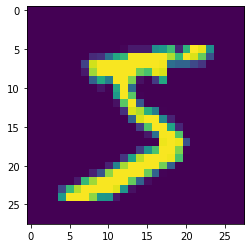

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0].view(28, -1)) # [^4] plt.show, plt.plot, what is pyplot


# Initial Python Model

- Initialization of parameter(1 hidden layer)


In [ ]:
from torch import randn, zeros
w = randn(train_x.shape[1], 10); w.shape
# help(randn)

torch.Size([784, 10])

In [ ]:
b = zeros(10); b.shape

torch.Size([10])

[^5]: * Be cautious


# Matrix multiplication
- use valid data only for amount of 5
- by the book(3 loop)
- check the time #[^6] timeit && time 차이

In [ ]:
import torch

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    out = torch.zeros(ar, bc)
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            for k in range(a.shape[1]): #br = ac
                out[i, j] += a[i, k] * b[k, j]
    return out

In [ ]:
m1 = valid_x[:5,]

In [ ]:
# import gc
gc.collect()

140

In [ ]:
%timeit -n 10 matmul(m1, w)

10 loops, best of 3: 703 ms per loop


In [ ]:
t1 =  matmul(m1, w)

In [ ]:
c.shape 

torch.Size([5, 10])

# Elementwise ops
- a,b로 1)더하기 2) 대소비교하기
- m을 이용해 Frobenius norm 만들기
 

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste.

In [ ]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])

In [ ]:
a + b

tensor([12., 14.,  3.])

In [ ]:
a < b

tensor([False,  True,  True])

In [ ]:
(a<b).sum()

tensor(2)

In [ ]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
m * m.T # !! symmetric!!!!!!!!!!!!! 
# [^7]

tensor([[ 1.,  8., 21.],
        [ 8., 25., 48.],
        [21., 48., 81.]])

In [ ]:
(m * m.T).sum(dim=0)

tensor([ 30.,  81., 150.])

In [ ]:
(m* m.T).sum(dim=1).sqrt()

tensor([ 5.4772,  9.0000, 12.2474])

# Elementwise matmul
- elementwise operation을 이용해 sigma를 하나 줄여보기 (i.e. 2 for loop)
- time을 이용해 시간재기 (여기는 timeit을 사용했네??)
- 가까운지 확인해보는 함수 만들기
    - torch.allclose사용 (`rtol: 1e-3, atol=1e-5`)
    - 그리고 export함

In [ ]:
m[0].shape, m[0,].shape

(torch.Size([3]), torch.Size([3]))

In [ ]:
def matmul2(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i] * b[:,j]).sum()
    return c

In [ ]:
# m1.shape, w.shape

In [ ]:
%timeit -n 10 matmul2(m1, w)

10 loops, best of 3: 1.01 ms per loop


In [ ]:
#export
def test_all(a,b): torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test_all(a,b)

In [ ]:
test_near(t1, matmul2(m1, w))

[^8]


allclose(input, other, rtol=1e-05, atol=1e-08, equal_nan=False) -> bool

This function checks if all :attr:`input` and :attr:`other` satisfy the condition:

.. math::
    \lvert \text{input} - \text{other} \rvert \leq \texttt{atol} + \texttt{rtol} \times \lvert \text{other} \rvert

elementwise, for all elements of :attr:`input` and :attr:`other`. The behaviour of this function is analogous to
`numpy.allclose <https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html>`_

Args:
    input (Tensor): first tensor to compare
    other (Tensor): second tensor to compare
    atol (float, optional): absolute tolerance. Default: 1e-08
    rtol (float, optional): relative tolerance. Default: 1e-05
    equal_nan (bool, optional): if ``True``, then two ``NaN`` s will be compared as equal. Default: ``False``

Example::

    >>> torch.allclose(torch.tensor([10000., 1e-07]), torch.tensor([10000.1, 1e-08]))
    False
    >>> torch.allclose(torch.tensor([10000., 1e-08]), torch.tensor([10000.1, 1e-09]))
    True
    >>> torch.allclose(torch.tensor([1.0, float('nan')]), torch.tensor([1.0, float('nan')]))
    False
    >>> torch.allclose(torch.tensor([1.0, float('nan')]), torch.tensor([1.0, float('nan')]), equal_nan=True)
    True

# Broadcasting

## Broadcasting with a scalar

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*



    Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.

- a(vector) 확인하고, 스칼라와 대소비교 및 덧뺄셈
- m(matrix) check, operation with scalar

In [ ]:
a

tensor([10.,  6., -4.])

In [ ]:
a+3

tensor([13.,  9., -1.])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
m<4

tensor([[ True,  True,  True],
        [False, False, False],
        [False, False, False]])

In [ ]:
(m<4).sum()

tensor(3)

In [ ]:
m.mean()

tensor(5.)

In [ ]:
m.mean().shape

torch.Size([])

In [ ]:
torch.tensor(1).shape

torch.Size([])

## Broadcasting a vector to a matrix


- m, c 크기 확인
- m과 c broadcasting 어떻게 되는지 확인해보기
- transitivity check 

In [23]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [ ]:
m, c

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]), tensor([10., 20., 30.]))

In [ ]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
m+c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c+m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c.stride()

(1,)

In [ ]:
help(c.stride)

Help on built-in function stride:

stride(...) method of torch.Tensor instance
    stride(dim) -> tuple or int
    
    Returns the stride of :attr:`self` tensor.
    
    Stride is the jump necessary to go from one element to the next one in the
    specified dimension :attr:`dim`. A tuple of all strides is returned when no
    argument is passed in. Otherwise, an integer value is returned as the stride in
    the particular dimension :attr:`dim`.
    
    Args:
        dim (int, optional): the desired dimension in which stride is required
    
    Example::
    
        >>> x = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
        >>> x.stride()
        (5, 1)
        >>>x.stride(0)
        5
        >>> x.stride(-1)
        1



In [18]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

[^8]

why 3,1??

In [19]:
m.stride()

(3, 1)

- torch tensor의 expand_as()에 대해 알아보자!
    - 값
    - 메모리
    - stride
    - shape
    - unsqueeze, shaping etc.


In [ ]:
mc = c.expand_as(m); mc

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [ ]:
mc.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [ ]:
mc.stride()

(0, 1)

In [ ]:
c.stride()

(1,)

In [ ]:
m + mc

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
# shape
mc.shape

torch.Size([3, 3])

In [ ]:
# unsqeeze

mc.unsqueeze(0), mc.unsqueeze(0).shape

(tensor([[[10., 20., 30.],
          [10., 20., 30.],
          [10., 20., 30.]]]), torch.Size([1, 3, 3]))

In [ ]:
mc.unsqueeze(-1)

tensor([[[10.],
         [20.],
         [30.]],

        [[10.],
         [20.],
         [30.]],

        [[10.],
         [20.],
         [30.]]])

- reshaping c to row vector, column vector
    - use squeeze
    - use None
- what if calculate c&m when `c` with `expand_as`, reshaped with `None`

In [ ]:
c, c.shape

(tensor([10., 20., 30.]), torch.Size([3]))

In [ ]:
c.unsqueeze(0) # (1,3)

tensor([[10., 20., 30.]])

In [ ]:
c.unsqueeze(-1) # (3, 1)

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
c[None,], c[None,].shape

(tensor([[10., 20., 30.]]), torch.Size([1, 3]))

In [ ]:
c[None]

tensor([[10., 20., 30.]])

In [ ]:
c[None:]

tensor([10., 20., 30.])

In [ ]:
c[None, ...]

tensor([[10., 20., 30.]])

[^9]: check the result of **c[None, -1]** since don't understand why that value came out.

In [28]:
c[None, -1]

tensor([30.])

In [ ]:
c[:, None]

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
c[..., None]

tensor([[10.],
        [20.],
        [30.]])

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

## Matmul with broadcasting

- do the matrix multiplication using broadcasting 
- compare time
- check if that value is simmilar with first matmul value

In [ ]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i,] = (a[i][:, None] * b).sum(dim=0)
    return c

In [ ]:
%timeit -n 10 matmul(m1, w)

10 loops, best of 3: 386 µs per loop


In [ ]:
test_near(matmul(m1, w), t1)

---

[^13]

여기서 좀 헤맸는데, (이하참고)<br/>
`@` 기호를 사용하면 안되는건가?
1. None을 써서 expand해서 sum한거랑
2. None 안쓰고 걍 matmul한거랑 같음 ㅋㅋㅋㅋㅋㅋㅋ

In [ ]:
(m1[0][:, None] *w).sum(dim=0)

tensor([ -3.7722, -15.7509,  -0.0308,  -8.1866,   3.8230,   5.2652,   0.5891,
         -8.2998,  17.3111,  -5.5104])

In [ ]:
m1[0]@w

tensor([ -3.7722, -15.7509,  -0.0308,  -8.1866,   3.8230,   5.2652,   0.5891,
         -8.2998,  17.3111,  -5.5104])

In [ ]:
(m1[0][None] @ w)

tensor([[ -3.7722, -15.7509,  -0.0308,  -8.1866,   3.8230,   5.2652,   0.5891,
          -8.2998,  17.3111,  -5.5104]])

In [ ]:
(m1[0][None] @ w).sum(dim=0)

tensor([ -3.7722, -15.7509,  -0.0308,  -8.1866,   3.8230,   5.2652,   0.5891,
         -8.2998,  17.3111,  -5.5104])

In [ ]:
a, m

(tensor([10.,  6., -4.]), tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]))

In [ ]:
a*m

tensor([[ 10.,  12., -12.],
        [ 40.,  30., -24.],
        [ 70.,  48., -36.]])

In [ ]:
(a * m).sum(dim=1)

tensor([10., 46., 82.])

## Broadcasting Rules

1. inserting axis as **1st**(using `None`), inserting axis to the 2nd dim
2. use 1, do matmul and return 3by3 matrix with dim=[3] vector(ex.,c)

In [ ]:
w[None].shape, w[:, None].shape, w[..., None].shape

(torch.Size([1, 784, 10]), torch.Size([784, 1, 10]), torch.Size([784, 10, 1]))

In [ ]:
c

tensor([10., 20., 30.])

In [ ]:
c[:, None] * c[None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [ ]:
c.expand_as(m) * c.expand_as(m).T

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

# Einstein summation

- do the ein_sum using torch.einsum()
- check the time with broadcasting
- compare value with the first thing

In [ ]:
torch.einsum('ij,jk->ik', m1, w).shape

torch.Size([5, 10])

[^14] this means they somewhat transfer string to index, arithmetic...check out the **source code**!

Einstein summation (`einsum`) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so `np.einsum('i,i', a, b)` is equivalent to `np.inner(a,b)`. If a label appears only once, it is not summed, so `np.einsum('i', a)` produces a view of a with no changes."

In [ ]:
%timeit -n 10 torch.einsum('ij,jk->ik', m1, w)

10 loops, best of 3: 56.5 µs per loop


In [ ]:
test_near(torch.einsum('ij,jk->ik', m1, w), t1)

In [ ]:
a = torch.randn(3,5,4)  
l = torch.randn(2,5)  
r = torch.randn(2,4)  
torch.einsum('bn,anm,bm-> ba', l, a, r).shape

torch.Size([2, 3])

# pytorch op : Using general lib given by pytorch

- do the pytorch matmul(hint: default of tensor)

In [ ]:
%timeit -n 10 m1.matmul(w)

10 loops, best of 3: 11 µs per loop


# export : save all the script you defined at this notebook

In [ ]:
!pip install fire

In [ ]:
!python3 notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to exp/nb_01.py


In [ ]:
!cat exp/nb_01.py


#################################################
### THIS FILE WAS AUTOGENERATED! DO NOT EDIT! ###
#################################################
# file to edit: dev_nb/01_matmul.ipynb

from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

# Question List

[1]: gzip does remove zip file after you unzip, so you should give `-k` arg

[2]: pathlib.resolve / pathlib.absolute, but issues are depends on python [versions](https://discuss.python.org/t/pathlib-absolute-vs-resolve/2573/2)

[3]: expected means number of values I gave

[5]: The last value of b (since this is categorial) should be defined using value, and the shape of tensor.

[6]: See the stackoverflow [answer1](https://stackoverflow.com/a/17579466/7934832), [answer2](https://stackoverflow.com/a/14650555/7934832) and jupyter built-in magic method [document](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

[7]: refer to [this](https://www.amazon.com/Linear-Algebra-4th-Stephen-Friedberg/dp/0130084514) book I used at class and answer later

[8]: *Unsolved* question

    Stride is the jump necessary to go from one element to the next one in the specified dimension :attr:`dim`.

~~~python
import torch
s = torch.randn(10, 4, 6)
s.stride()
>>> (24, 6, 1)
~~~    



[9]: See below

~~~python
c = torch.tensor([10., 20., 30])
c[-1], c[-1].shape
>>> (tensor(30.), torch.Size([]))
c[None, -1]
>>> (tensor([30.]), torch.Size([1]))
~~~